In [2]:
import sys
sys.path.insert(1,'/home/bl9/gempy')
import gempy as gp
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

import vtk
import evtk

from scipy.interpolate import griddata

import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

/home/bl9/gempy/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


In [3]:
rescale_f = 38000

In [4]:
# IMPORTING MODEL TRACES
M = pymc.database.hdf5.load('./input_data/Traces/prior_model_noBlocks_SSFc_3_1000iter_2017_11_12')
M_L1 = pymc.database.hdf5.load('./input_data/Traces/post_model_150_30-350_30-250_20_1000iter50burn.hdf5')
M_L2 = pymc.database.hdf5.load('./input_data/Traces/post_model_300_30-050_10-400_40_1000iter50burn.hdf5')
M_L3 = pymc.database.hdf5.load('./input_data/Traces/post_model_300_30-400_40_050_10_1000iter50burn.hdf5')
M_LSSF1 = pymc.database.hdf5.load('./input_data/Traces/post_M-150-20_300-30_250-25_SSF1.5-0.5_1000iter50burn.hdf5')
M_LSSF2 = pymc.database.hdf5.load('./input_data/Traces/post_M-NoTHL_SSF3-0.3_1000iter50burn.hdf5')

In [5]:
# UNPACKING DIFFERENT TRACES
res_top_unc_trace = M.trace('z_unc_res_top')[:]
offset_unc_trace = M.trace('offset_unc')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:]
interp_trace = M.trace('interp_unc')[:]
fw_res_th_trace = M.trace('res_th')[:]
fw_seal_th_trace = M.trace('seal_th')[:]
fw_sec_res_th_trace = M.trace('sec_res_th')[:]

max_volume_trace = structural_model_trace[:,0]
SSF_trace = structural_model_trace[:,1]
trap_control_trace = structural_model_trace[:,2]


res_top_unc_trace_L1 = M_L1.trace('z_unc_res_top')[:]
offset_unc_trace_L1 = M_L1.trace('offset_unc')[:]
fault_sealing_trace_L1 = M_L1.trace('fault_sealing_unc')[:]
structural_model_trace_L1 = M_L1.trace('structural_model')[:] 
interp_trace_L1 = M_L1.trace('interp_unc')[:]
fw_res_th_trace_L1 = M_L1.trace('res_th')[:]
fw_seal_th_trace_L1 = M_L1.trace('seal_th')[:]
fw_sec_res_th_trace_L1 = M_L1.trace('sec_res_th')[:]

max_volume_trace_L1 = structural_model_trace_L1[:,0]
SSF_trace_L1 = structural_model_trace_L1[:,1]
trap_control_trace_L1 = structural_model_trace_L1[:,2]


res_top_unc_trace_L2 = M_L2.trace('z_unc_res_top')[:]
offset_unc_trace_L2 = M_L2.trace('offset_unc')[:]
fault_sealing_trace_L2 = M_L2.trace('fault_sealing_unc')[:]
structural_model_trace_L2 = M_L2.trace('structural_model')[:] 
interp_trace_L2 = M_L2.trace('interp_unc')[:]
fw_res_th_trace_L2 = M_L2.trace('res_th')[:]
fw_seal_th_trace_L2 = M_L2.trace('seal_th')[:]
fw_sec_res_th_trace_L2 = M_L2.trace('sec_res_th')[:]

max_volume_trace_L2 = structural_model_trace_L2[:,0]
SSF_trace_L2 = structural_model_trace_L2[:,1]
trap_control_trace_L2 = structural_model_trace_L2[:,2]


res_top_unc_trace_L3 = M_L3.trace('z_unc_res_top')[:]
offset_unc_trace_L3 = M_L3.trace('offset_unc')[:]
fault_sealing_trace_L3 = M_L3.trace('fault_sealing_unc')[:]
structural_model_trace_L3 = M_L3.trace('structural_model')[:] 
interp_trace_L3 = M_L3.trace('interp_unc')[:]
fw_res_th_trace_L3 = M_L3.trace('res_th')[:]
fw_seal_th_trace_L3 = M_L3.trace('seal_th')[:]
fw_sec_res_th_trace_L3 = M_L3.trace('sec_res_th')[:]

max_volume_trace_L3 = structural_model_trace_L3[:,0]
SSF_trace_L3 = structural_model_trace_L3[:,1]
trap_control_trace_L3 = structural_model_trace_L3[:,2]


res_top_unc_trace_LSSF1 = M_LSSF1.trace('z_unc_res_top')[:]
offset_unc_trace_LSSF1 = M_LSSF1.trace('offset_unc')[:]
fault_sealing_trace_LSSF1 = M_LSSF1.trace('fault_sealing_unc')[:]
structural_model_trace_LSSF1 = M_LSSF1.trace('structural_model')[:] 
interp_trace_LSSF1 = M_LSSF1.trace('interp_unc')[:]
fw_res_th_trace_LSSF1 = M_LSSF1.trace('res_th')[:]
fw_seal_th_trace_LSSF1 = M_LSSF1.trace('seal_th')[:]
fw_sec_res_th_trace_LSSF1 = M_LSSF1.trace('sec_res_th')[:]

max_volume_trace_LSSF1 = structural_model_trace_LSSF1[:,0]
SSF_trace_LSSF1 = structural_model_trace_LSSF1[:,1]
trap_control_trace_LSSF1 = structural_model_trace_LSSF1[:,2]


res_top_unc_trace_LSSF2 = M_LSSF2.trace('z_unc_res_top')[:]
offset_unc_trace_LSSF2 = M_LSSF2.trace('offset_unc')[:]
fault_sealing_trace_LSSF2 = M_LSSF2.trace('fault_sealing_unc')[:]
structural_model_trace_LSSF2 = M_LSSF2.trace('structural_model')[:] 
interp_trace_LSSF2 = M_LSSF2.trace('interp_unc')[:]
#fw_res_th_trace_LSSF2 = M_LSSF2.trace('res_th')[:]
#fw_seal_th_trace_LSSF2 = M_LSSF2.trace('seal_th')[:]
#fw_sec_res_th_trace_LSSF2 = M_LSSF2.trace('sec_res_th')[:]

max_volume_trace_LSSF2 = structural_model_trace_LSSF2[:,0]
SSF_trace_LSSF2 = structural_model_trace_LSSF2[:,1]
trap_control_trace_LSSF2 = structural_model_trace_LSSF2[:,2]

In [11]:
len(max_volume_trace_LSSF2)

1000

In [14]:
#CUSTOM LOSS FUNCTION
estimates_s = np.arange(0,60000000, 10000)

# weight factors
ov = 1.25
ov_b = 2
uv_b = 1.5

# risk factor range
risks_s = np.arange(0.5, 1.6, 0.25)

# cutom loss fucntion including risk factors
def volume_lossR(estimate_s, true_s, risk_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s == 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s == 0)
        loss_s[underest] = (true_s[underest] - estimate_s)*(risk_s**-0.5)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
        loss_s[overest_bad] = np.abs((true_s[overest_bad]-estimate_s))*(ov_b*risk_s)
        return loss_s

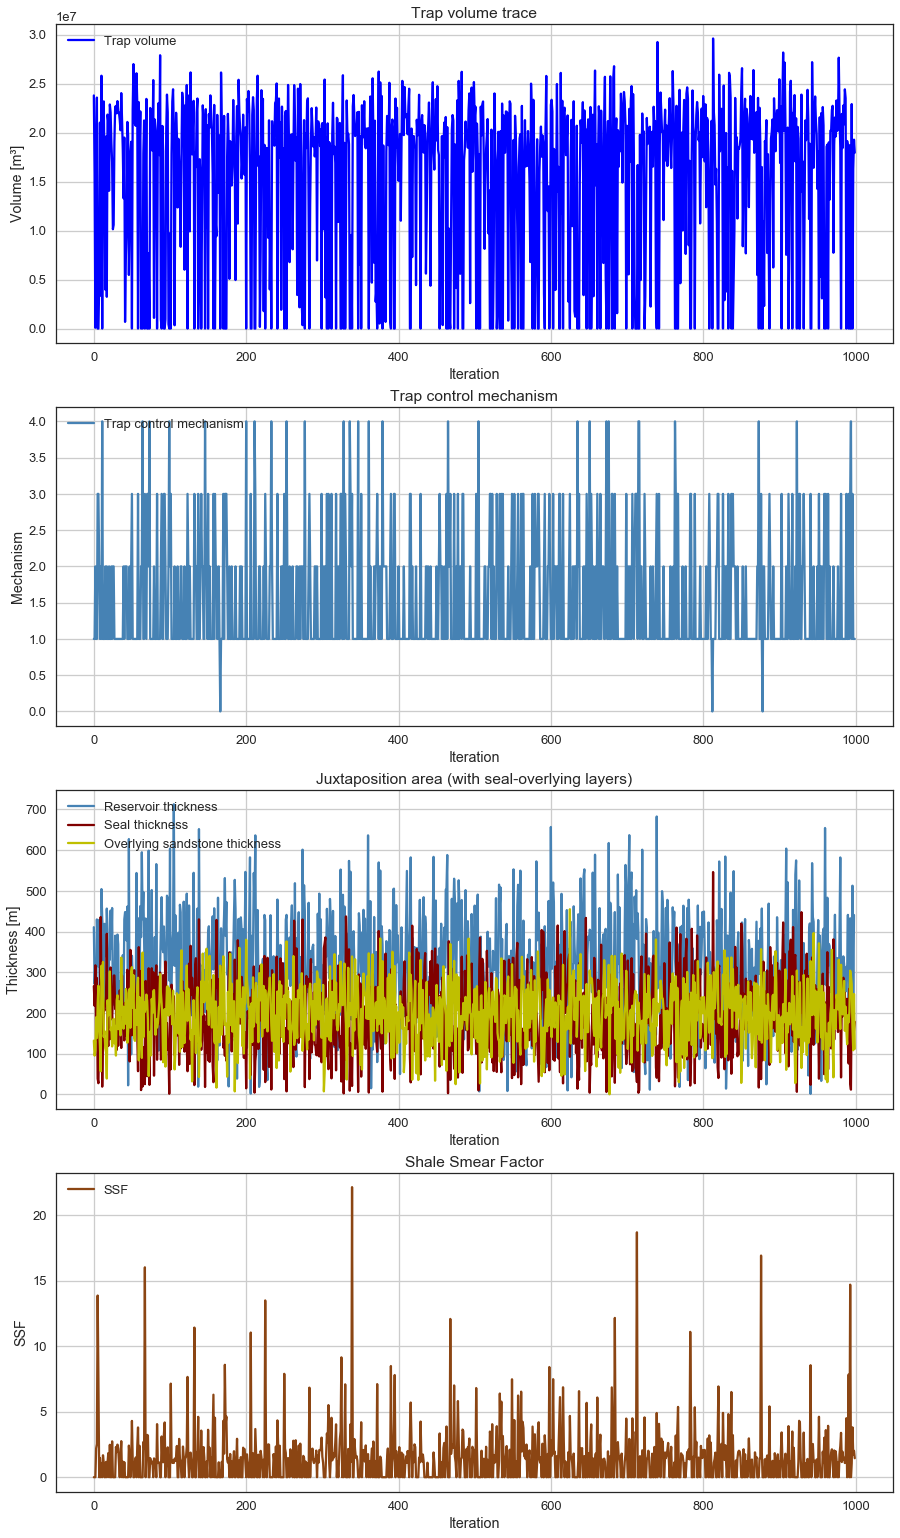

In [6]:
# PLOTTING SOME TRACES
figsize(15,27)
fig, ax = plt.subplots(4, 1)

ax[0].plot(max_volume_trace, color='b', label='Trap volume')
ax[0].set_title('Trap volume trace')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Volume [m³]')
ax[0].legend(loc="upper left")
ax[0].grid()

ax[1].plot(trap_control_trace, color='steelblue', label='Trap control mechanism')
ax[1].set_title('Trap control mechanism')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mechanism')
ax[1].legend(loc="upper left")
ax[1].grid()

ax[2].plot(fw_res_th_trace, color='steelblue', label='Reservoir thickness')
ax[2].plot(fw_seal_th_trace, color='maroon', label='Seal thickness')
ax[2].plot(fw_sec_res_th_trace, color='y', label='Overlying sandstone thickness')
#ax[2].plot(offset_unc_trace*rescale_f, color='r', label='Change in offset')
ax[2].set_title('Juxtaposition area (with seal-overlying layers)')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Thickness [m]')
ax[2].legend(loc="upper left")
ax[2].grid()

ax[3].plot(SSF_trace, color='saddlebrown', label='SSF')
ax[3].set_title('Shale Smear Factor')
ax[3].set_xlabel('Iteration')
ax[3].set_ylabel('SSF')
ax[3].legend(loc="upper left")
ax[3].grid()

In [7]:
# COUNT TRAP CONTROL OCCURRENCES
uniques, counts = np.unique(trap_control_trace, return_counts=True)
counts = np.round((counts/1000)*100)

# Models: only thickness likelihoods
uniques1, counts1 = np.unique(trap_control_trace_L1, return_counts=True)
counts1 = np.round((counts1/1000)*100)
uniques2, counts2 = np.unique(trap_control_trace_L2, return_counts=True)
counts2 = np.round((counts2/1000)*100)
uniques3, counts3 = np.unique(trap_control_trace_L3, return_counts=True)
counts3 = np.round((counts3/1000)*100)

# Model: thickness and SSF likelihoods
uniques4, counts4 = np.unique(trap_control_trace_LSSF1, return_counts=True)
counts4 = np.append([0],np.round((counts4/1000)*100))

# Model: only SSF likelihood
uniques5, counts5 = np.unique(trap_control_trace_LSSF2, return_counts=True)
counts5 = np.round((counts5/1000)*100)

labels = ('UNCLEAR', 'SPILL POINT', 'LEAK UNDER', 'LEAK OVER', 'STRAT')
trap_base = dict(zip(labels, [0,0,0,0,0]))
trap_controls = dict(zip(labels, counts))
trap_controls1 = dict(zip(labels, np.append(counts1,[0,0])))
trap_controls2 = dict(zip(labels, np.append(counts2,[0])))
trap_controls3 = dict(zip(labels,  np.append(counts3,[0])))

trap_controls4 = dict(zip(labels,  np.append(counts4,[0,0])))
trap_controls5 = dict(zip(labels,  counts5))
#unknown = trap_controls[0]
#spill_point = trap_controls[1]
#leak_point = trap_controls[2]
#over_juxta = trap_controls[3]
#strat_adj = trap_controls[4]

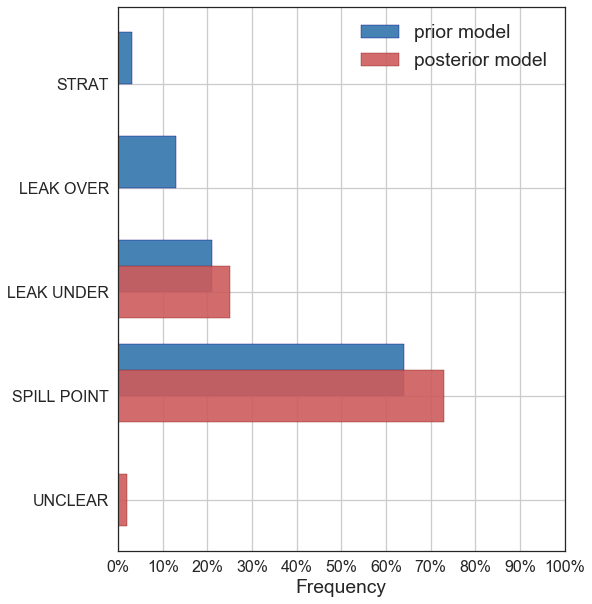

In [8]:
# FREQUENCY OF TRAP CONTROL MECHANISMS (PRIOR AND POSTERIOR)
figsize(8,10)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'legend.fontsize': 'large'})
ax = plt.subplot(111)
#Y = np.arange(len(trap_controls))
width = 0.5
Y = [0,1,2,3,4]
rects1 = ax.barh(Y, trap_controls.values(), width, align='edge', color='steelblue', edgecolor='darkblue', label = 'prior model')
rects2 = ax.barh(Y, trap_controls1.values(), width, align='center', color = 'indianred', edgecolor='maroon', label = 'posterior model', alpha = 0.9)
#ax.barh(Y, combined1, 'grouped')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
X = np.arange(0,101,10)
ax.set_xticks(X)
ax.set_xlabel('Frequency')
ax.set_yticklabels(trap_controls.keys())
ax.set_yticks(Y)
xmax = 100
ax.set_xlim(0, xmax)
ax.legend()
ax.grid()
#ax.show()

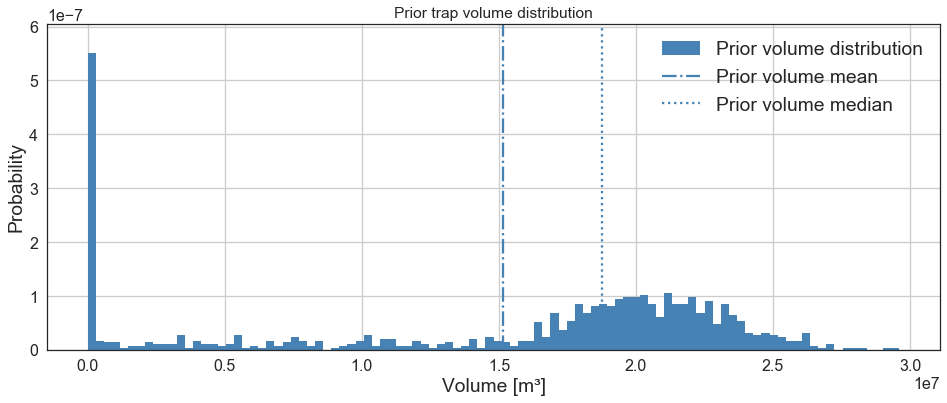

In [9]:
# PRIOR TRAP VOLUME DISTRIBUTION
figsize(16, 6)

# Possibly mask away complete failures:
#volumes = max_volume_trace
#mask = volumes == 0
#masked_trace = volumes[~mask]

_hist1 = plt.hist(max_volume_trace, bins=100, normed=True, 
                  histtype="stepfilled",label="Prior volume distribution", color = "steelblue")
plt.vlines(max_volume_trace.mean(), 0, 1.1 * np.max(_hist1[0]), label="Prior volume mean", linestyles="-.", color = "steelblue")
plt.vlines(np.median(max_volume_trace), 0, 1.1 * np.max(_hist1[0]), label="Prior volume median", linestyles=":", color = "steelblue")
plt.title("Prior trap volume distribution")
plt.legend(loc="upper right")
#plt.xticks(np.arange(0, np.max(_hist1[0])+1, np.max(_hist1[0])/10))
plt.grid()
plt.ylim(0, 1.1 * np.max(_hist1[0]))
plt.xlabel("Volume [m³]")
plt.ylabel("Probability")

In [10]:
### CONVERT TRAP VOLUMES TO RECOVERABLE OIL VOLUMES
por = 0.3
sat_wat = 0.2
form_f = 1.05
RF = 0.8

def recov_res(vol, por, sat_wat, form_f, RF):
    ooip = (vol*por*(1-sat_wat))/(form_f)
    recov = ooip * RF
    return(recov)

recoverable_reserves = recov_res(max_volume_trace, por, sat_wat, form_f, RF)
recoverable_reserves_L = recov_res(max_volume_trace_L1, por, sat_wat, form_f, RF)


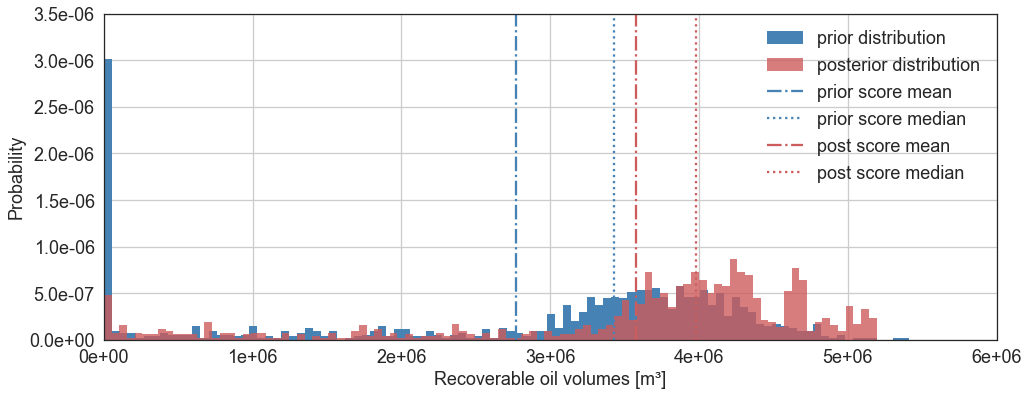

In [11]:
# ROV DISTRIBUTIONS (PRIOR AND POSTERIOR)
figsize(16, 6)
fig = plt.figure()
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize': 'medium'})
plt.rcParams.update({'axes.titlesize': 'medium'})
plt.rcParams.update({'legend.fontsize': 'medium'})

ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

_hist1 = ax.hist(recoverable_reserves, bins=100, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

_hist2 = ax.hist(recoverable_reserves_L, bins=100, normed=True, histtype="stepfilled",label="posterior distribution", color = "indianred", alpha = 0.8)

ax.vlines(recoverable_reserves.mean(), 0, 0.0000035, label="prior score mean", linestyles="-.", color = "steelblue")
ax.vlines(np.median(recoverable_reserves), 0, 0.0000035, label="prior score median", linestyles=":", color = "steelblue")

ax.vlines(recoverable_reserves_L.mean(), 0, 0.0000035, label="post score mean", linestyles="-.", color = "indianred")
ax.vlines(np.median(recoverable_reserves_L), 0, 0.0000035, label="post score median", linestyles=":", color = "indianred")

#ax.set_title("(A) - Prior and posterior ROV distribution")
ax.legend(loc="upper right");
ax.grid()
ax.set_ylim(0,0.0000035)
ax.set_xlim(0, 6000000)
ax.set_xlabel("Recoverable oil volumes [m³]")
ax.set_ylabel("Probability")
plt.show()

Bayes action (minimum) at risk r 0.50: 3753691.43 --- expected loss: 1135418.65
Bayes action (minimum) at risk r 0.75: 3440640.00 --- expected loss: 1516701.30
Bayes action (minimum) at risk r 1.00: 3129051.43 --- expected loss: 1839273.69
Bayes action (minimum) at risk r 1.25: 2219154.29 --- expected loss: 2074371.96
Bayes action (minimum) at risk r 1.50: 1271222.86 --- expected loss: 2132889.61


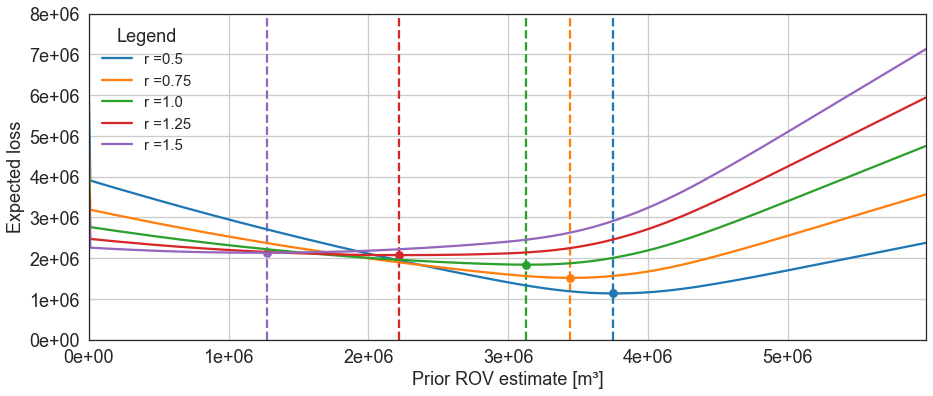

In [15]:
# PRIOR DECISIONS (LOSS FUNCTION)
estimates_s = np.arange(0,6000000, 10000)

figsize(15, 6)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.rcParams.update({'legend.fontsize': 'small'})

expected_loss_s = lambda estimate_s, risk_s: volume_lossR(estimate_s, recoverable_reserves, risk_s).mean()

for r in risks_s:
    _color = next(ax._get_lines.prop_cycler)
    loss = [expected_loss_s(e, r) for e in estimates_s]
    _min_vol = sop.fmin(expected_loss_s, -40, args=(r,),disp = False)
    if _min_vol < 0:
        _min_vol = 0
    plt.plot(estimates_s, loss, label = "r ="+str(r), color=_color['color'])
    plt.scatter(_min_vol, expected_loss_s(_min_vol,r), s = 70, color=_color['color'])#, label = "Bayes action r "+str(r))
    plt.vlines(_min_vol, 0, 10 * np.max(loss), color=_color['color'], linestyles="--")
    print("Bayes action (minimum) at risk r %.2f: %.2f --- expected loss: %.2f" % (r, _min_vol,\
                                                                              expected_loss_s(_min_vol,r)))
    
#ax.set_title("""Custom loss function (IV) including risk factor r""")    
ax.legend(loc="upper left", scatterpoints=1, title="Legend")
#plt.vlines(0, 0, 1.1 * np.max(loss), label="zero score", linestyles="-")
#plt.vlines(res_score.mean(), 0, 1.1 * np.max(loss), label="posterior's mean", linestyles="-.")
#plt.vlines(np.median(res_score), 0, 1.1 * np.max(loss), label="score median", linestyles=":")
ax.set_xlabel("Prior ROV estimate [m³]")
ax.set_ylabel("Expected loss")
ax.set_xlim(estimates_s[0], estimates_s[-1])
ax.set_ylim(0,8000000)
ax.grid()

Bayes action (minimum) at risk r 0.50: 4273005.71 --- expected loss: 708015.35
Bayes action (minimum) at risk r 0.75: 4050651.43 --- expected loss: 917909.58
Bayes action (minimum) at risk r 1.00: 3880960.00 --- expected loss: 1092911.18
Bayes action (minimum) at risk r 1.25: 3696640.00 --- expected loss: 1246131.85
Bayes action (minimum) at risk r 1.50: 3614720.00 --- expected loss: 1385665.64


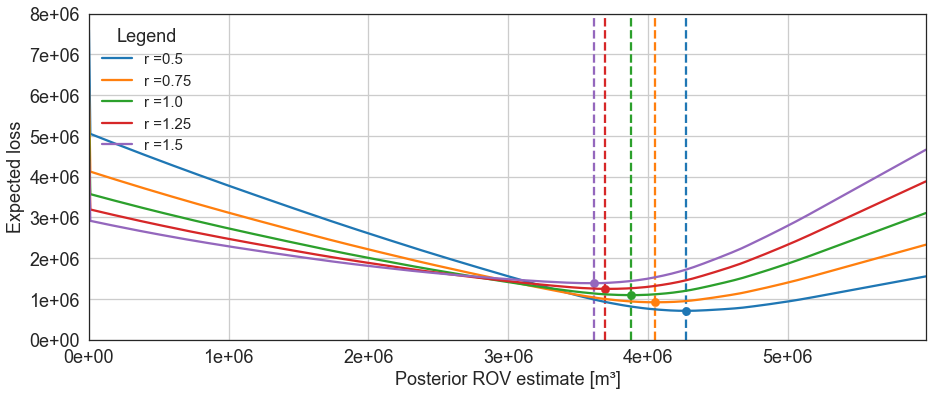

In [16]:
# POSTERIOR DECISIONS (LOSS FUNCTION)
estimates_s = np.arange(0,6000000, 10000)

figsize(15, 6)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.rcParams.update({'legend.fontsize': 'small'})

expected_loss_s = lambda estimate_s, risk_s: volume_lossR(estimate_s, recoverable_reserves_L, risk_s).mean()

for r in risks_s:
    _color = next(ax._get_lines.prop_cycler)
    loss = [expected_loss_s(e, r) for e in estimates_s]
    _min_vol = sop.fmin(expected_loss_s, -40, args=(r,),disp = False)
    if _min_vol < 0:
        _min_vol = 0
    plt.plot(estimates_s, loss, label = "r ="+str(r), color=_color['color'])
    plt.scatter(_min_vol, expected_loss_s(_min_vol,r), s = 70, color=_color['color'])#, label = "Bayes action r "+str(r))
    plt.vlines(_min_vol, 0, 10 * np.max(loss), color=_color['color'], linestyles="--")
    print("Bayes action (minimum) at risk r %.2f: %.2f --- expected loss: %.2f" % (r, _min_vol,\
                                                                              expected_loss_s(_min_vol,r)))
    
#ax.set_title("""Custom loss function (IV) including risk factor r""")    
ax.legend(loc="upper left", scatterpoints=1, title="Legend")
#plt.vlines(0, 0, 1.1 * np.max(loss), label="zero score", linestyles="-")
#plt.vlines(res_score.mean(), 0, 1.1 * np.max(loss), label="posterior's mean", linestyles="-.")
#plt.vlines(np.median(res_score), 0, 1.1 * np.max(loss), label="score median", linestyles=":")
ax.set_xlabel("Posterior ROV estimate [m³]")
ax.set_ylabel("Expected loss")
ax.set_xlim(estimates_s[0], estimates_s[-1])
ax.set_ylim(0,8000000)
ax.grid()